## Loading the libraries and the dataset

_____________________________________________________

In [1]:
#!pip install matplotlib
#!pip install seaborn

In [2]:
# Importing necessary libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("Corona1.csv")
df

,Title,Content,Score,Vac Hes/Non
0,b'My moms scaring tf out of me ....',b'My mom is anti-vaccine and a very spiritual ...,13,H
1,b'22(F) Skeptic but willing to have my mind ch...,b'Hey guys\n\nIm a 22 year old female who is t...,7,H
2,"b'Had first shot, over studying the vaccine an...","b'I had the first shot about 13 days ago, had ...",3,H
3,b'Numbness/Tingling/Itching - 6 Weeks Post Pfi...,So I'll start off by saying that I'm a nurse ...,92,H
4,b'Afraid to get vaccinated but not sure why.',b'I havent gotten the COVID vaccine yet becaus...,62,H
...,...,...,...,...
6478,b'Question about Queensland vaccine dose repor...,Apologies if this has been discussed here befo...,1,NaN
6479,b'r/CoronavirusDownunder random daily discussi...,# Other news\n\n**Feel free to talk about the...,9,NaN
6480,b'Australia records 0 new local cases (3-Feb-2...,b'# No new local cases in the last 24 hours\n\...,47,NaN
6481,b'Five eyes leaked dossier on virus origin',b'Interesting read \nhttps://nypost.com/2020/0...,9,NaN


In [4]:
# Decoding the 'Content' and 'Title' columns if they are in bytes format
df['Content'] = df['Content'].map(lambda x: x.decode() if isinstance(x, bytes) else x)

# Removing any leading "b'" or 'b"' and trailing "'" or '"' from 'Content' and 'Title' columns
df['Content'] = df['Content'].map(lambda x: x.lstrip("b'").rstrip("'") if isinstance(x, str) and x.startswith("b'") else x)
df['Content'] = df['Content'].map(lambda x: x.lstrip('b"').rstrip('"') if isinstance(x, str) and x.startswith('b"') else x)
df['Title'] = df['Title'].map(lambda x: x.decode() if isinstance(x, bytes) else x)
df['Title'] = df['Title'].map(lambda x: x.lstrip("b'").rstrip("'") if isinstance(x, str) and x.startswith("b'") else x)
df['Title'] = df['Title'].map(lambda x: x.lstrip('b"').rstrip('"') if isinstance(x, str) and x.startswith('b"') else x)
df

,Title,Content,Score,Vac Hes/Non
0,My moms scaring tf out of me ....,My mom is anti-vaccine and a very spiritual pe...,13,H
1,22(F) Skeptic but willing to have my mind changed,Hey guys\n\nIm a 22 year old female who is tak...,7,H
2,"Had first shot, over studying the vaccine and ...","I had the first shot about 13 days ago, had mi...",3,H
3,Numbness/Tingling/Itching - 6 Weeks Post Pfize...,So I'll start off by saying that I'm a nurse ...,92,H
4,Afraid to get vaccinated but not sure why.,I havent gotten the COVID vaccine yet because ...,62,H
...,...,...,...,...
6478,Question about Queensland vaccine dose reporti...,Apologies if this has been discussed here befo...,1,NaN
6479,r/CoronavirusDownunder random daily discussion...,# Other news\n\n**Feel free to talk about the...,9,NaN
6480,Australia records 0 new local cases (3-Feb-2021),# No new local cases in the last 24 hours\n\n*...,47,NaN
6481,Five eyes leaked dossier on virus origin,Interesting read \nhttps://nypost.com/2020/05/...,9,NaN


In [5]:
# Checking for any Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6483 entries, 0 to 6482
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        6483 non-null   object
 1   Content      4030 non-null   object
 2   Score        6483 non-null   int64 
 3   Vac Hes/Non  198 non-null    object
dtypes: int64(1), object(3)
memory usage: 202.7+ KB


In [6]:
df["Content"].isnull().sum()

2453

In [7]:
# Filling null values in "Content" with corresponding "Title" column value
df = df.fillna({"Content": df["Title"]})

In [8]:
# Dropping the "Title" column
df = df.drop("Title", axis = 1)
df

,Content,Score,Vac Hes/Non
0,My mom is anti-vaccine and a very spiritual pe...,13,H
1,Hey guys\n\nIm a 22 year old female who is tak...,7,H
2,"I had the first shot about 13 days ago, had mi...",3,H
3,So I'll start off by saying that I'm a nurse ...,92,H
4,I havent gotten the COVID vaccine yet because ...,62,H
...,...,...,...
6478,Apologies if this has been discussed here befo...,1,NaN
6479,# Other news\n\n**Feel free to talk about the...,9,NaN
6480,# No new local cases in the last 24 hours\n\n*...,47,NaN
6481,Interesting read \nhttps://nypost.com/2020/05/...,9,NaN


___________________________________

## Data Preprocessing

__________________________________

In [9]:
# pip install redditcleaner

In [10]:
# Prepare redditcleaner
import redditcleaner

# Cleaning the 'Content' column using redditcleaner and removing newline characters, url, etc.
df['Content'] = df['Content'].apply(lambda x: redditcleaner.clean(x, newline=True, quote=True, bullet_point=True, 
                                                                  link=True, strikethrough=True, spoiler=True,
                                                                  code=True, superscript=True, table=True, heading=True))
    
df["Content"] = df["Content"].apply(lambda x: x.replace(r'\n', ''))
df

,Content,Score,Vac Hes/Non
0,My mom is anti-vaccine and a very spiritual pe...,13,H
1,Hey guysIm a 22 year old female who is taking ...,7,H
2,"I had the first shot about 13 days ago, had mi...",3,H
3,So I'll start off by saying that I'm a nurse a...,92,H
4,I havent gotten the COVID vaccine yet because ...,62,H
...,...,...,...
6478,Apologies if this has been discussed here befo...,1,NaN
6479,Other newsFeel free to talk about the COVID-1...,9,NaN
6480,No new local cases in the last 24 hours All A...,47,NaN
6481,Interesting read https://nypost.com/2020/05/02...,9,NaN


In [11]:
df["Content"][1]

'Hey guysIm a 22 year old female who is taking birth control and with the recent news of blood clots on the vaccine I am a little skeptical on the vaccine.Im not anti-vaccine by any stretch but just concerned about the possibility of blood clots being amplified in combination with the pill.If anyone on this sub is in the same boat and has been vaccinated I would really appreciate some helpful words on how youve felt after being vaccinated I want safety for everyone and dont want to possibly put myself in danger, but also want to keep the public safe Thanks so much Edit: Im also regularly active, work out 5-6 times a week and eat relatively healthy'

In [12]:
#pip install spacy

# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk

In [13]:
# Print the set of spaCy's default stop words
print(nlp.Defaults.stop_words)

{"'m", 'own', 'are', 'must', 'using', 'upon', 'always', '‘ll', 'least', 'hereupon', 'quite', 'everything', 'there', 'them', 'not', 'say', 'is', 'although', 'no', 'itself', 'take', 'on', 'therein', 'various', 'keep', 'himself', 'those', 'made', 'thence', 'herself', 'sometime', 'only', 'were', 'hereby', 'have', 'first', 'but', 'few', 'over', 'nothing', 'hundred', 'at', 'among', 'than', 'go', 'whether', 'between', 'whose', 'across', 'amongst', 'from', 'your', 'though', 'into', 'whereas', 'yourselves', 'would', 'much', 'about', 'otherwise', 'now', 'through', 'please', 'all', 'either', '’ll', 'latter', 'every', 'their', 'also', 'nor', 'seems', 'whatever', 'it', 'again', 'sometimes', 'enough', 'name', 'side', 'without', 'his', 'used', 'many', 'somehow', 'four', 'after', 'to', 'who', 'beside', 'around', 'where', 'due', 'anything', 'nine', 'whereafter', 'another', 'ours', 'may', 'which', 'however', 'how', 'within', 'somewhere', 'seeming', 'hers', 'and', 'up', 'before', 'unless', 'already', '’s

In [14]:
# Checking what all words are stopwords from Research point of view

nlp.vocab['get'].is_stop

True

In [15]:
# Remove the word from the set of stop words

nlp.Defaults.stop_words.remove('not')
nlp.Defaults.stop_words.remove('side')

# Remove the stop_word tag from the lexeme

nlp.vocab['not'].is_stop = False
nlp.vocab['side'].is_stop = False



# Omission of 'not' can lead to inconsistency in labelling the data as some users are expressing that they are 
# not hesitant to vaccines or not antivaxxers. Also, people usually write side-effects without the hyphen which 
# makes the word 'side' a stopword.

In [16]:
# Importing string for string operations and contractions for handling contractions in text data
import string 
import re 
# !pip install contractions
import contractions

In [17]:
# Creating a doc object by applying spacy's nlp.pipe on 'Content' column 
# of the DataFrame
doc = nlp.pipe(df["Content"])
tokenizer = nlp.tokenizer

In [18]:
# Use the re.sub function to remove URL from each element of the column
df["Content"] = df["Content"].apply(lambda x: re.sub(r"\S*https?:\S*", "", x))

# Text cleaning process
def text_cleaning(txt):
    # Lowercase the text
    txt = txt.lower()
    
    # Removing punctuations
    txt = txt.translate(str.maketrans("", "", string.punctuation))
    
    # Remove numbers
    txt = re.sub("\d+", "", txt)

    # Remove contractions
    txt = contractions.fix(txt)
    
    # Return cleaned text
    return txt

df["Content"] = df["Content"].apply(text_cleaning)


# Keeping words which are seperated by hyphens as a single token by addition of a rule
tokenizer.token_match = lambda text: re.match(r"\w+-\w+", text)

# Stpowords and punctutation removal, Lematization, Entity Recognition and Parts of Speech
doc = list(doc)          # convert doc to a list
try:
    df["Tokens"], df["Entity"] = zip(*[([token.lemma_ for token in d if not token.is_punct and not token.is_stop and not token.is_space], 
                                        [(ent.text, ent.label_) for ent in d.ents]) for d in doc])
    df["POS"] = [[token.pos_ for token in d] for d in doc]
            
except ValueError:
    pass

df

,Content,Score,Vac Hes/Non,Tokens,Entity,POS
0,my mom is antivaccine and a very spiritual per...,13,H,"[mom, antivaccine, spiritual, person, believe,...",[],"[PRON, NOUN, AUX, NOUN, CCONJ, DET, ADV, ADJ, ..."
1,hey guysim a year old female who is taking bi...,7,H,"[hey, guysim, year, old, female, take, birth, ...","[(a year old, DATE), (vaccineim, GPE)]","[INTJ, NOUN, DET, SPACE, NOUN, ADJ, NOUN, PRON..."
2,i had the first shot about days ago had mild ...,3,H,"[shoot, day, ago, mild, symptom, light, headac...","[(first, ORDINAL), (about days ago, DATE), (m...","[PRON, VERB, DET, ADJ, VERB, ADV, SPACE, NOUN,..."
3,so ill start off by saying that i am a nurse a...,92,H,"[ill, start, say, nurse, not, antivaccine, kno...","[(november, DATE), (a few weeks, DATE), (june,...","[ADV, ADJ, VERB, ADP, ADP, VERB, SCONJ, PRON, ..."
4,i have not gotten the covid vaccine yet becaus...,62,H,"[not, get, covid, vaccine, not, know, long, te...","[(months, DATE), (decades, DATE), (months, DAT...","[PRON, AUX, PART, VERB, DET, ADJ, NOUN, ADV, S..."
...,...,...,...,...,...,...
6478,apologies if this has been discussed here befo...,1,NaN,"[apology, discuss, see, queensland, antivaxxer...","[(queensland, GPE)]","[NOUN, SCONJ, PRON, AUX, AUX, VERB, ADV, SCONJ..."
6479,other newsfeel free to talk about the covid s...,9,NaN,"[newsfeel, free, talk, covid, situation, count...",[],"[SPACE, ADJ, NOUN, ADJ, PART, VERB, ADP, DET, ..."
6480,no new local cases in the last hours all aus...,47,NaN,"[new, local, case, hour, australian, state, te...","[(the last hours, TIME), (australian, NORP), ...","[SPACE, DET, ADJ, ADJ, NOUN, ADP, DET, ADJ, SP..."
6481,interesting read damning dossier leaked from ...,9,NaN,"[interesting, read, damn, dossier, leak, eye, ...","[(five, CARDINAL), (five, CARDINAL), (the wuha...","[ADJ, VERB, SPACE, VERB, NOUN, VERB, ADP, DET,..."


___________

## Data cleaning using Topics Modelling

_____________

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

In [20]:
# Using TfidfVectorizer for converting features into numerical features for NMF
tf_vectorizer = TfidfVectorizer(analyzer=lambda x: x, max_features = 1000, ngram_range=(1,3))

# Making a list with all the tokens from the column "Tokens"
tok = df["Tokens"].tolist()

# transform the generated tokens from df["Tokens"] into a matrix of term frequencies and inverse document frequencies
tf_idf_mat = tf_vectorizer.fit_transform(tok)

tfidf_feature_names = tf_vectorizer.get_feature_names()
tf_idf_mat

<6483x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 151627 stored elements in Compressed Sparse Row format>

In [21]:
# Using CountVectorizer for converting features into numerical features for LDA
cv = CountVectorizer(analyzer = lambda x: x, max_df = 0.95, min_df = 2, max_features = 1000, ngram_range=(1,3))
cv_ft = cv.fit_transform(tok)
cv_feature_names = cv.get_feature_names()
cv_ft

<6483x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 151625 stored elements in Compressed Sparse Row format>

In [22]:
# create an LDA object with 4 topics
LDA = LatentDirichletAllocation(n_components = 5, random_state = 10)

# fit the matrix of term frequencies and inverse document frequencies and extract the topics and their distributions
LDA.fit(cv_ft)

LatentDirichletAllocation(n_components=5, random_state=10)

In [23]:
# Just like LDA, create and NMF with 4 topics
nmf = NMF(n_components = 5, random_state = 10)
nmf.fit(tf_idf_mat)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=5, random_state=10)

In [24]:
# Extracting the topics and their distributions from LDA and NMF models
lda_comp = LDA.components_
nmf_comp = nmf.components_

In [25]:
# Defining a function to print the top keywords for each topic
def top_keywords(comp, feat_names, ntop_words):
    for i, topic in enumerate(comp):
        message = "Topic #%d: " % i
        message += " ".join([feat_names[j] for j in topic.argsort()[:-ntop_words - 1:-1]])
        print(message)

In [26]:
# Printing the top keywords for LDA and NMF topics
print("LDA Topics:")
top_keywords(lda_comp, cv_feature_names, 20)
print("\nNMF Topics:")
top_keywords(nmf_comp, tfidf_feature_names, 20)

LDA Topics:
Topic #0: not get vaccinate covid know go want year time like vaccine feel work family mask people think tell live come
Topic #1: not get feel day side effect vaccine shot dose go like experience pain second bad arm symptom week pfizer fever
Topic #2: test positive covid case reff symptom day th cough daily throat effect restriction estimate negative plus vaccination rollout smell project
Topic #3: not vaccine people covid conspiracy like think post know want vaccinate believe say theory antivaxxer antivaccine medical good government vaccination
Topic #4: vaccine covid effect side dose vaccination pfizer risk study booster hesitancy case myocarditis not effective infection week uk month mrna

NMF Topics:
Topic #0: not people vaccinate know want like vaccine get think go say year time work thing tell come need mask good
Topic #1: reff estimate rollout project plus daily restriction linear image log scale case vaccination late th effect nsw vic september october
Topic #2: vac

In [27]:
# Transforming the term frequency and tf-idf matrices using LDA and NMF models respectively
LDA_topic = LDA.transform(cv_ft)
NMF_topic = nmf.transform(tf_idf_mat)

In [28]:
# Defining a function to plot the dominant topic probability for each document
def plot_topic(topic):
    plt.figure(figsize=(12,8))
    plt.bar(np.arange(topic.shape[0]), topic.max(axis=1))
    plt.xlabel("Document")
    plt.ylabel("Dominant Topic Probability")
    plt.show()

LDA Dominant Topics:


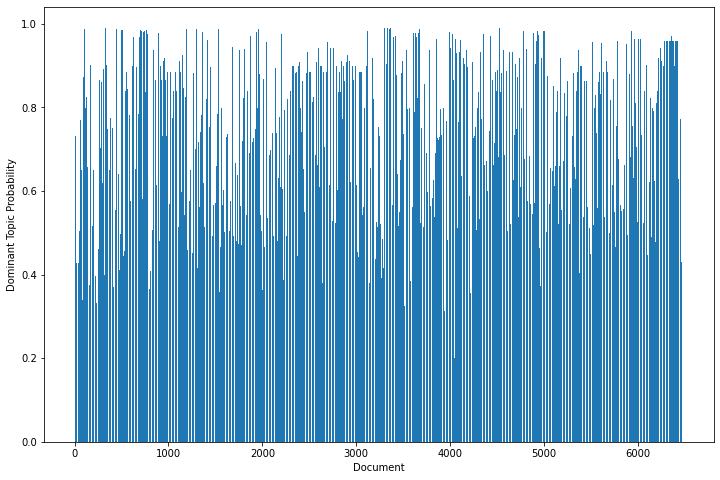


NMF Dominant Topics:


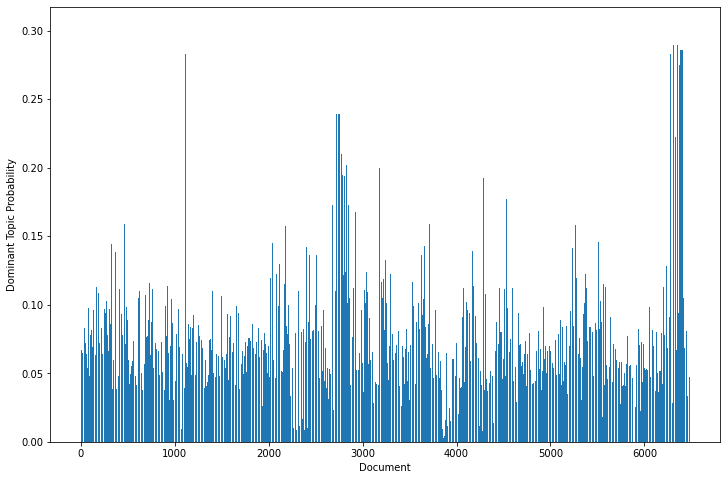

In [29]:
# Plotting the dominant topic probabilities for LDA and NMF models
print("LDA Dominant Topics:")
plot_topic(LDA_topic)
print("\nNMF Dominant Topics:")
plot_topic(NMF_topic)

In [30]:
# Creating a list of topic numbers
topic_numbers = ["1", "2", "3", "4", "5"]

# Adding columns to the DataFrame to store the dominant topic number for each document using LDA and NMF models
df["LDA Dominant Topic"] = LDA_topic.argmax(axis = 1)
df["Dominant Topic Number using LDA"] = df["LDA Dominant Topic"].map(lambda x: topic_numbers[x])

df["NMF Dominant Topic"] = NMF_topic.argmax(axis = 1)
df["Dominant Topic Number using NMF"] = df["NMF Dominant Topic"].map(lambda x: topic_numbers[x])

In [31]:
df

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF
0,my mom is antivaccine and a very spiritual per...,13,H,"[mom, antivaccine, spiritual, person, believe,...",[],"[PRON, NOUN, AUX, NOUN, CCONJ, DET, ADV, ADJ, ...",0,1,0,1
1,hey guysim a year old female who is taking bi...,7,H,"[hey, guysim, year, old, female, take, birth, ...","[(a year old, DATE), (vaccineim, GPE)]","[INTJ, NOUN, DET, SPACE, NOUN, ADJ, NOUN, PRON...",0,1,0,1
2,i had the first shot about days ago had mild ...,3,H,"[shoot, day, ago, mild, symptom, light, headac...","[(first, ORDINAL), (about days ago, DATE), (m...","[PRON, VERB, DET, ADJ, VERB, ADV, SPACE, NOUN,...",1,2,3,4
3,so ill start off by saying that i am a nurse a...,92,H,"[ill, start, say, nurse, not, antivaccine, kno...","[(november, DATE), (a few weeks, DATE), (june,...","[ADV, ADJ, VERB, ADP, ADP, VERB, SCONJ, PRON, ...",1,2,3,4
4,i have not gotten the covid vaccine yet becaus...,62,H,"[not, get, covid, vaccine, not, know, long, te...","[(months, DATE), (decades, DATE), (months, DAT...","[PRON, AUX, PART, VERB, DET, ADJ, NOUN, ADV, S...",0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6478,apologies if this has been discussed here befo...,1,NaN,"[apology, discuss, see, queensland, antivaxxer...","[(queensland, GPE)]","[NOUN, SCONJ, PRON, AUX, AUX, VERB, ADV, SCONJ...",3,4,0,1
6479,other newsfeel free to talk about the covid s...,9,NaN,"[newsfeel, free, talk, covid, situation, count...",[],"[SPACE, ADJ, NOUN, ADJ, PART, VERB, ADP, DET, ...",3,4,2,3
6480,no new local cases in the last hours all aus...,47,NaN,"[new, local, case, hour, australian, state, te...","[(the last hours, TIME), (australian, NORP), ...","[SPACE, DET, ADJ, ADJ, NOUN, ADP, DET, ADJ, SP...",4,5,1,2
6481,interesting read damning dossier leaked from ...,9,NaN,"[interesting, read, damn, dossier, leak, eye, ...","[(five, CARDINAL), (five, CARDINAL), (the wuha...","[ADJ, VERB, SPACE, VERB, NOUN, VERB, ADP, DET,...",3,4,4,5


Considering how the topics are vividly seperated, NMF feels like the best model out of the 2.

In [32]:
# Getting the number of records in each topic in NMF
topic_counts = df.groupby("NMF Dominant Topic").count()
print(topic_counts)

                    Content  Score  Vac Hes/Non  Tokens  Entity   POS  \
NMF Dominant Topic                                                      
0                      2256   2256           81    2256    2256  2256   
1                       202    202            0     202     202   202   
2                      1910   1910           16    1910    1910  1910   
3                      1620   1620          101    1620    1620  1620   
4                       495    495            0     495     495   495   

                    LDA Dominant Topic  Dominant Topic Number using LDA  \
NMF Dominant Topic                                                        
0                                 2256                             2256   
1                                  202                              202   
2                                 1910                             1910   
3                                 1620                             1620   
4                                  495

In [33]:
# columns = ["Content", "NMF Dominant Topic"]
# df[columns].to_csv("nmf_results.csv")

In [34]:
# Filtering records which doesn't have 'vaccine' as their keyword and then deleting them
relevant_rcrds_t4 = df[df["NMF Dominant Topic"] == 4].loc[~df["Content"].str.contains("vaccine")]
relevant_rcrds_t4

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF
532,if you believe covid is real do not want to ge...,0,NaN,"[believe, covid, real, not, want, believe, boo...","[(one, CARDINAL)]","[SCONJ, PRON, VERB, ADJ, AUX, ADJ, AUX, PART, ...",3,4,4,5
574,this sub has grown very fast and we are sharin...,22,NaN,"[sub, grow, fast, share, good, information, im...","[(new year, DATE)]","[DET, NOUN, AUX, VERB, ADV, ADV, CCONJ, PRON, ...",3,4,4,5
577,so almost anything posted about getting bad si...,9,NaN,"[post, get, bad, side, effect, gets, censor, n...",[],"[ADV, ADV, PRON, VERB, ADP, VERB, ADJ, NOUN, N...",3,4,4,5
579,i feel good about it i tried to hide it from m...,2,NaN,"[feel, good, try, hide, conspiracy, theory, fr...","[(one, CARDINAL)]","[PRON, VERB, ADJ, ADP, PRON, PRON, VERB, PART,...",3,4,4,5
593,pretty sure the mod is a bot it would be nice ...,0,NaN,"[pretty, sure, mod, bot, nice, lose, hate, con...",[],"[ADV, ADJ, DET, NOUN, AUX, DET, NOUN, PRON, AU...",3,4,4,5
...,...,...,...,...,...,...,...,...,...,...
6451,this is the nightly opu discussion thread for ...,4,NaN,"[nightly, opu, discussion, thread, coronavirus...","[(the last hours, TIME)]","[PRON, AUX, DET, ADV, ADJ, NOUN, NOUN, ADP, NO...",2,3,4,5
6461,i have some close family members who are stron...,18,NaN,"[close, family, member, strongly, conspiracy, ...","[(australia, GPE)]","[PRON, VERB, DET, ADJ, NOUN, NOUN, PRON, AUX, ...",3,4,4,5
6465,this is the nightly opu discussion thread for ...,7,NaN,"[nightly, opu, discussion, thread, coronavirus...","[(the last hours, TIME)]","[PRON, AUX, DET, ADV, ADJ, NOUN, NOUN, ADP, NO...",2,3,4,5
6468,this is the nightly opu discussion thread for ...,3,NaN,"[nightly, opu, discussion, thread, coronavirus...","[(the last hours nsw, TIME), (july, DATE),...","[PRON, AUX, DET, ADV, ADJ, NOUN, NOUN, ADP, NO...",2,3,4,5


In [35]:
df2 = df
df2.drop(relevant_rcrds_t4.index, inplace=True)

In [36]:
df2.shape

(6133, 10)

In [37]:
# Deleting the records belonging to Topic 1 as they aren't relevant for the analysis
df2 = df2.drop(df[df["NMF Dominant Topic"] == 1].index)

In [38]:
df2.shape

(5931, 10)

In [39]:
df2

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF
0,my mom is antivaccine and a very spiritual per...,13,H,"[mom, antivaccine, spiritual, person, believe,...",[],"[PRON, NOUN, AUX, NOUN, CCONJ, DET, ADV, ADJ, ...",0,1,0,1
1,hey guysim a year old female who is taking bi...,7,H,"[hey, guysim, year, old, female, take, birth, ...","[(a year old, DATE), (vaccineim, GPE)]","[INTJ, NOUN, DET, SPACE, NOUN, ADJ, NOUN, PRON...",0,1,0,1
2,i had the first shot about days ago had mild ...,3,H,"[shoot, day, ago, mild, symptom, light, headac...","[(first, ORDINAL), (about days ago, DATE), (m...","[PRON, VERB, DET, ADJ, VERB, ADV, SPACE, NOUN,...",1,2,3,4
3,so ill start off by saying that i am a nurse a...,92,H,"[ill, start, say, nurse, not, antivaccine, kno...","[(november, DATE), (a few weeks, DATE), (june,...","[ADV, ADJ, VERB, ADP, ADP, VERB, SCONJ, PRON, ...",1,2,3,4
4,i have not gotten the covid vaccine yet becaus...,62,H,"[not, get, covid, vaccine, not, know, long, te...","[(months, DATE), (decades, DATE), (months, DAT...","[PRON, AUX, PART, VERB, DET, ADJ, NOUN, ADV, S...",0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6477,association of vitamin d with the modulation o...,15,NaN,"[association, vitamin, d, modulation, disease,...",[],"[PROPN, ADP, NOUN, NOUN, ADP, DET, NOUN, ADP, ...",4,5,2,3
6478,apologies if this has been discussed here befo...,1,NaN,"[apology, discuss, see, queensland, antivaxxer...","[(queensland, GPE)]","[NOUN, SCONJ, PRON, AUX, AUX, VERB, ADV, SCONJ...",3,4,0,1
6479,other newsfeel free to talk about the covid s...,9,NaN,"[newsfeel, free, talk, covid, situation, count...",[],"[SPACE, ADJ, NOUN, ADJ, PART, VERB, ADP, DET, ...",3,4,2,3
6481,interesting read damning dossier leaked from ...,9,NaN,"[interesting, read, damn, dossier, leak, eye, ...","[(five, CARDINAL), (five, CARDINAL), (the wuha...","[ADJ, VERB, SPACE, VERB, NOUN, VERB, ADP, DET,...",3,4,4,5


_______________________________________________

## Labelling the data using Machine Learning

_______________________________________________

In [40]:
# Getting count of records for each category of "Vac Hes/Non"
df2.groupby("Vac Hes/Non").count()

,Content,Score,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF
Vac Hes/Non,,,,,,,,,
H,64,64,64,64,64,64,64,64,64
N,134,134,134,134,134,134,134,134,134


In [41]:
# Import the all the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix

In [42]:
# The data is split into 2 parts: one with the rows that have 'H' and 'N' values, and the rest have NaN values
df2_lab = df2[df2["Vac Hes/Non"].notna()] 
df2_notlab = df2[df2["Vac Hes/Non"].isna()]
print(df2_lab.shape)
print(df2_notlab.shape)

(198, 10)
(5733, 10)


In [43]:
# Transforming the text data in df2 into numerical features
x = cv.transform(df2_lab["Tokens"])
y = df2_lab["Vac Hes/Non"]

In [44]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [45]:
# Create a list of models
ML_models = [LogisticRegression(C = 2), MultinomialNB(alpha = 2), RandomForestClassifier(n_estimators = 50)]

# Loop through each model and fit, predict and evaluate
for m in ML_models:
    # Fit the model on the training set
    m.fit(x_train, y_train)

    # Predict the labels for the testing set
    y_test_pred = m.predict(x_test)

    # Calculate and print the accuracy, precision, recall, f1_score and confusion matrix
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average = 'weighted')
    rec = recall_score(y_test, y_test_pred, average = 'weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Print all the results for each model
    print(f"\nMetrics for {m.__class__.__name__}:")
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{cm}")



Metrics for LogisticRegression:
Accuracy: 0.65
Precision: 0.7372180451127819
Recall: 0.65
F1-score: 0.6686666666666667
Confusion Matrix:
[[ 8  3]
 [11 18]]

Metrics for MultinomialNB:
Accuracy: 0.75
Precision: 0.7656695156695157
Recall: 0.75
F1-score: 0.755952380952381
Confusion Matrix:
[[ 7  4]
 [ 6 23]]

Metrics for RandomForestClassifier:
Accuracy: 0.75
Precision: 0.7283549783549783
Recall: 0.75
F1-score: 0.7302867383512546
Confusion Matrix:
[[ 4  7]
 [ 3 26]]


We will choose the MultinomialNB classifier in this case considering the accuracy, precision, recall and F1-score is better than the other 2 at 0.75, 0.765, 0.75 and 0.755. ALso, as you can see in the confusion matrix, the True Positive and True negative values are much higher which concludes that the MultinomialNB model is best performing.

In [46]:
# Selecting the MultinomialNB from the ML_models list
bst_model = ML_models[1]

# Transform the "Tokens" in df2_notlab into numerical features using CountVectorizer
x_notlab = cv.transform(df2_notlab["Tokens"])

# Use the best-performing classifier to make predictions for the unlabelled data
y_notlab_pred = bst_model.predict(x_notlab)

# Add the predicted labels to the unlabelled data
df2_notlab["Vac Hes/Non"] = y_notlab_pred

C:\Users\USER\AppData\Local\Temp/ipykernel_12548/1326426658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_notlab["Vac Hes/Non"] = y_notlab_pred


In [47]:
# Print the predicted labels
print(df2_notlab.groupby("Vac Hes/Non").count())

             Content  Score  Tokens  Entity   POS  LDA Dominant Topic  \
Vac Hes/Non                                                             
H               2469   2469    2469    2469  2469                2469   
N               3264   3264    3264    3264  3264                3264   

             Dominant Topic Number using LDA  NMF Dominant Topic  \
Vac Hes/Non                                                        
H                                       2469                2469   
N                                       3264                3264   

             Dominant Topic Number using NMF  
Vac Hes/Non                                   
H                                       2469  
N                                       3264  


In [48]:
# Update the "Vac Hes/Non" column in df2 with the predicted labels
df2.loc[df2_notlab.index, "Vac Hes/Non"] = y_notlab_pred
df2.isnull().count()

Content                            5931
Score                              5931
Vac Hes/Non                        5931
Tokens                             5931
Entity                             5931
POS                                5931
LDA Dominant Topic                 5931
Dominant Topic Number using LDA    5931
NMF Dominant Topic                 5931
Dominant Topic Number using NMF    5931
dtype: int64

__________________________

## Sentiment and Keyword Analysis

________________________________

In [49]:
# Downloading the necessary package for VADER analysis
# nltk.download('vader_lexicon')

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

In [51]:
# Defining a function to calculate sentiment scores for a given text
def senti_scores(txt):
    
    # Calculate sentiment scores
    scores = sid.polarity_scores(txt)
    
    # Return sentiment scores
    return scores

In [52]:
# Splitting the dataset into 2 categroies of "Vac Hes/Non" column
vac_hes_df = df2[df2["Vac Hes/Non"] == 'H']
vac_non_df = df2[df2["Vac Hes/Non"] == 'N']

In [53]:
# Inserting the sentiment scores in the dataframe in the form of a new column
df2['Scores'] = df2['Content']. apply(senti_scores)
df2

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF,Scores
0,my mom is antivaccine and a very spiritual per...,13,H,"[mom, antivaccine, spiritual, person, believe,...",[],"[PRON, NOUN, AUX, NOUN, CCONJ, DET, ADV, ADJ, ...",0,1,0,1,"{'neg': 0.162, 'neu': 0.798, 'pos': 0.04, 'com..."
1,hey guysim a year old female who is taking bi...,7,H,"[hey, guysim, year, old, female, take, birth, ...","[(a year old, DATE), (vaccineim, GPE)]","[INTJ, NOUN, DET, SPACE, NOUN, ADJ, NOUN, PRON...",0,1,0,1,"{'neg': 0.044, 'neu': 0.732, 'pos': 0.224, 'co..."
2,i had the first shot about days ago had mild ...,3,H,"[shoot, day, ago, mild, symptom, light, headac...","[(first, ORDINAL), (about days ago, DATE), (m...","[PRON, VERB, DET, ADJ, VERB, ADV, SPACE, NOUN,...",1,2,3,4,"{'neg': 0.117, 'neu': 0.796, 'pos': 0.088, 'co..."
3,so ill start off by saying that i am a nurse a...,92,H,"[ill, start, say, nurse, not, antivaccine, kno...","[(november, DATE), (a few weeks, DATE), (june,...","[ADV, ADJ, VERB, ADP, ADP, VERB, SCONJ, PRON, ...",1,2,3,4,"{'neg': 0.051, 'neu': 0.802, 'pos': 0.147, 'co..."
4,i have not gotten the covid vaccine yet becaus...,62,H,"[not, get, covid, vaccine, not, know, long, te...","[(months, DATE), (decades, DATE), (months, DAT...","[PRON, AUX, PART, VERB, DET, ADJ, NOUN, ADV, S...",0,1,0,1,"{'neg': 0.147, 'neu': 0.755, 'pos': 0.097, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...
6477,association of vitamin d with the modulation o...,15,N,"[association, vitamin, d, modulation, disease,...",[],"[PROPN, ADP, NOUN, NOUN, ADP, DET, NOUN, ADP, ...",4,5,2,3,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
6478,apologies if this has been discussed here befo...,1,H,"[apology, discuss, see, queensland, antivaxxer...","[(queensland, GPE)]","[NOUN, SCONJ, PRON, AUX, AUX, VERB, ADV, SCONJ...",3,4,0,1,"{'neg': 0.031, 'neu': 0.897, 'pos': 0.072, 'co..."
6479,other newsfeel free to talk about the covid s...,9,H,"[newsfeel, free, talk, covid, situation, count...",[],"[SPACE, ADJ, NOUN, ADJ, PART, VERB, ADP, DET, ...",3,4,2,3,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp..."
6481,interesting read damning dossier leaked from ...,9,H,"[interesting, read, damn, dossier, leak, eye, ...","[(five, CARDINAL), (five, CARDINAL), (the wuha...","[ADJ, VERB, SPACE, VERB, NOUN, VERB, ADP, DET,...",3,4,4,5,"{'neg': 0.1, 'neu': 0.773, 'pos': 0.126, 'comp..."


In [54]:
df2.groupby(df2['Vac Hes/Non'] == 'H').count()

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF,Scores
Vac Hes/Non,,,,,,,,,,,
False,3398,3398,3398,3398,3398,3398,3398,3398,3398,3398,3398
True,2533,2533,2533,2533,2533,2533,2533,2533,2533,2533,2533


In [55]:
# Inserting a new column "Compound" which contains the compound value from the "Scores" column
df2["Compound"]  = df2["Scores"].apply(lambda score_dict: score_dict["compound"])

# Inserting a new column "Sentiment" which is a binary form of "Compound"
# If compound is >= 0 then Sentiment is 1 or else 0
df2["Sentiment"] = df2["Compound"].apply(lambda c: "1" if c >=0 else "0")
df2.drop("Scores", axis = 1, inplace = True)

#cols = ["Content", "Sentiment", "Vac Hes/Non"]
#df2.to_csv("Corona1.csv", columns = cols, index = False)
df2

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF,Compound,Sentiment
0,my mom is antivaccine and a very spiritual per...,13,H,"[mom, antivaccine, spiritual, person, believe,...",[],"[PRON, NOUN, AUX, NOUN, CCONJ, DET, ADV, ADJ, ...",0,1,0,1,-0.9657,0
1,hey guysim a year old female who is taking bi...,7,H,"[hey, guysim, year, old, female, take, birth, ...","[(a year old, DATE), (vaccineim, GPE)]","[INTJ, NOUN, DET, SPACE, NOUN, ADJ, NOUN, PRON...",0,1,0,1,0.9745,1
2,i had the first shot about days ago had mild ...,3,H,"[shoot, day, ago, mild, symptom, light, headac...","[(first, ORDINAL), (about days ago, DATE), (m...","[PRON, VERB, DET, ADJ, VERB, ADV, SPACE, NOUN,...",1,2,3,4,-0.4969,0
3,so ill start off by saying that i am a nurse a...,92,H,"[ill, start, say, nurse, not, antivaccine, kno...","[(november, DATE), (a few weeks, DATE), (june,...","[ADV, ADJ, VERB, ADP, ADP, VERB, SCONJ, PRON, ...",1,2,3,4,0.9562,1
4,i have not gotten the covid vaccine yet becaus...,62,H,"[not, get, covid, vaccine, not, know, long, te...","[(months, DATE), (decades, DATE), (months, DAT...","[PRON, AUX, PART, VERB, DET, ADJ, NOUN, ADV, S...",0,1,0,1,-0.9122,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,association of vitamin d with the modulation o...,15,N,"[association, vitamin, d, modulation, disease,...",[],"[PROPN, ADP, NOUN, NOUN, ADP, DET, NOUN, ADP, ...",4,5,2,3,0.2960,1
6478,apologies if this has been discussed here befo...,1,H,"[apology, discuss, see, queensland, antivaxxer...","[(queensland, GPE)]","[NOUN, SCONJ, PRON, AUX, AUX, VERB, ADV, SCONJ...",3,4,0,1,0.7913,1
6479,other newsfeel free to talk about the covid s...,9,H,"[newsfeel, free, talk, covid, situation, count...",[],"[SPACE, ADJ, NOUN, ADJ, PART, VERB, ADP, DET, ...",3,4,2,3,0.8176,1
6481,interesting read damning dossier leaked from ...,9,H,"[interesting, read, damn, dossier, leak, eye, ...","[(five, CARDINAL), (five, CARDINAL), (the wuha...","[ADJ, VERB, SPACE, VERB, NOUN, VERB, ADP, DET,...",3,4,4,5,0.7003,1


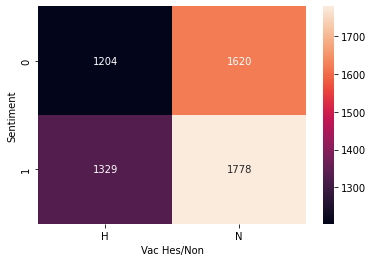

In [56]:
# Creating a confusion matrix using crosstab
vac_matrix = pd.crosstab(df2["Sentiment"], df2["Vac Hes/Non"], rownames = ["Sentiment"], colnames = ["Vac Hes/Non"])

# Visualizing the confusion matrix using a heatmap
sns.heatmap(vac_matrix, annot=True, fmt = "d")
plt.show()

In [57]:
# Importing necessary libraries for keyword analysis
from collections import Counter
#!pip install wordcloud
from wordcloud import WordCloud

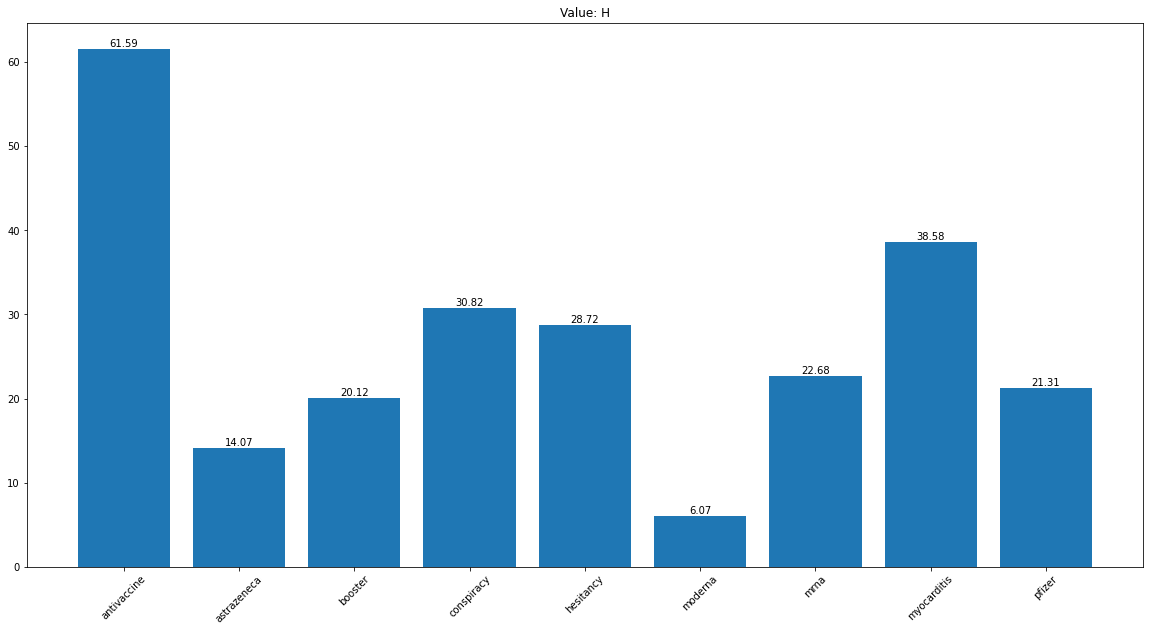

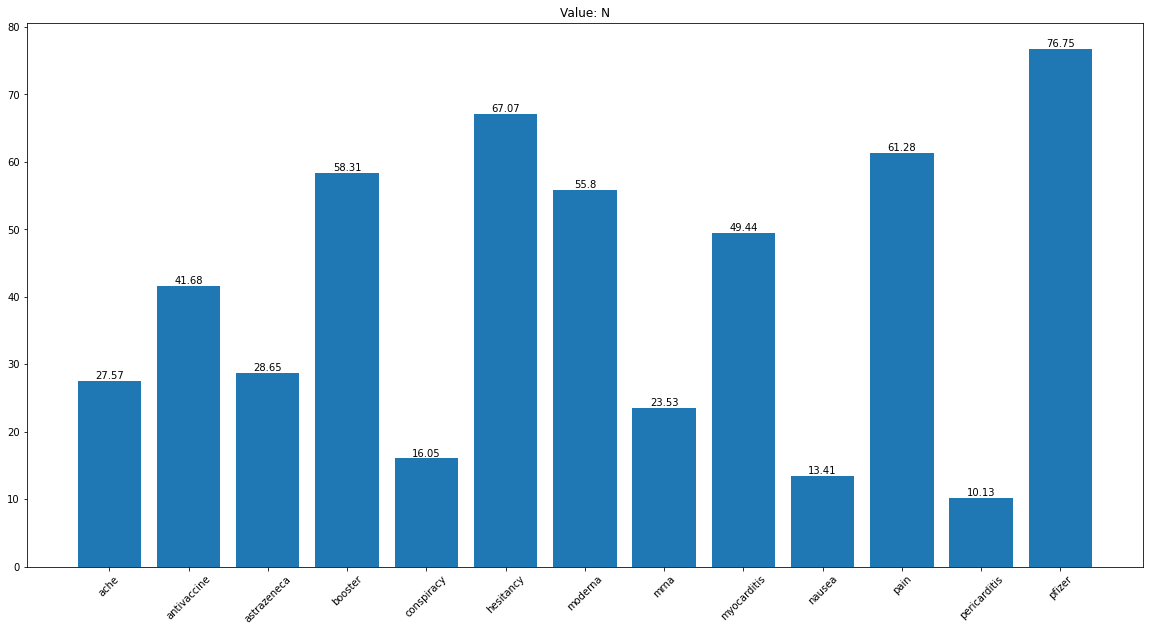

In [72]:
# Function to include only important words in the bar chart
def include_important_words(tf_vectorizer, txt, important_words):
    # Fitting the TfidfVectorizer on the text data and transforming it into a matrix of TF-IDF features
    tf_idf_mat = tf_vectorizer.fit_transform(txt)
    
    # Getting the feature names (keywords) and their tf-idf scores
    kwords = tf_vectorizer.get_feature_names()
    scores = np.sum(tf_idf_mat.toarray(), axis=0)
    
    # Creating a dictionary of keywords and their scores
    kwords_scores = dict(zip(kwords, scores))
    
    # Include only important words in the dictionary
    kwords_scores = {k: v for k, v in kwords_scores.items() if k in important_words}
    
    return kwords_scores

# Set the ngram_range parameter when creating the TfidfVectorizer object
tf_vectorizer = TfidfVectorizer(analyzer='word', max_features=1000, ngram_range=(1, 3))

# Define the list of important words that you want to include in the bar chart

important_words = ['myocarditis', 'antivaxxers', 'pericarditis', 'nausea', 'menstrual', 'ache', 'pain', 'hesitancy', 
                     'conspiracy', 'booster', 'pfizer', 'moderna', 'astrazeneca', 'mrna', 'antivaccine']

# Looping through each unique value in the 'Vac Hes/Non' column
for val in df2['Vac Hes/Non'].unique():
    # Filtering the records for the current value and joining the tokens into a single string
    txt = df2[df2['Vac Hes/Non'] == val]['Tokens'].apply(' '.join)
    
    # Call the function to get the dictionary of keywords and their scores with only important words
    kwords_scores = include_important_words(tf_vectorizer, txt, important_words)
    
    # Creating a bar plot of the top keywords and their scores
    plt.figure(figsize=(20, 10))  # Increase the size of the chart
    bar = plt.bar(kwords_scores.keys(), kwords_scores.values())
    plt.xticks(rotation=45)
    for b in bar:
        yval = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
    plt.title(f"Value: {val}")
    plt.show()

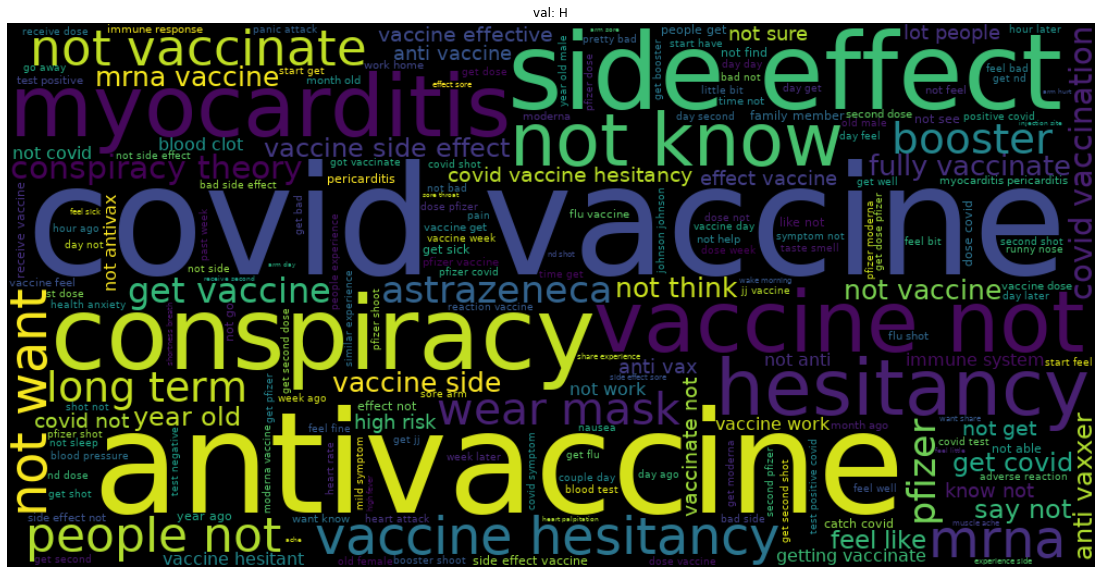

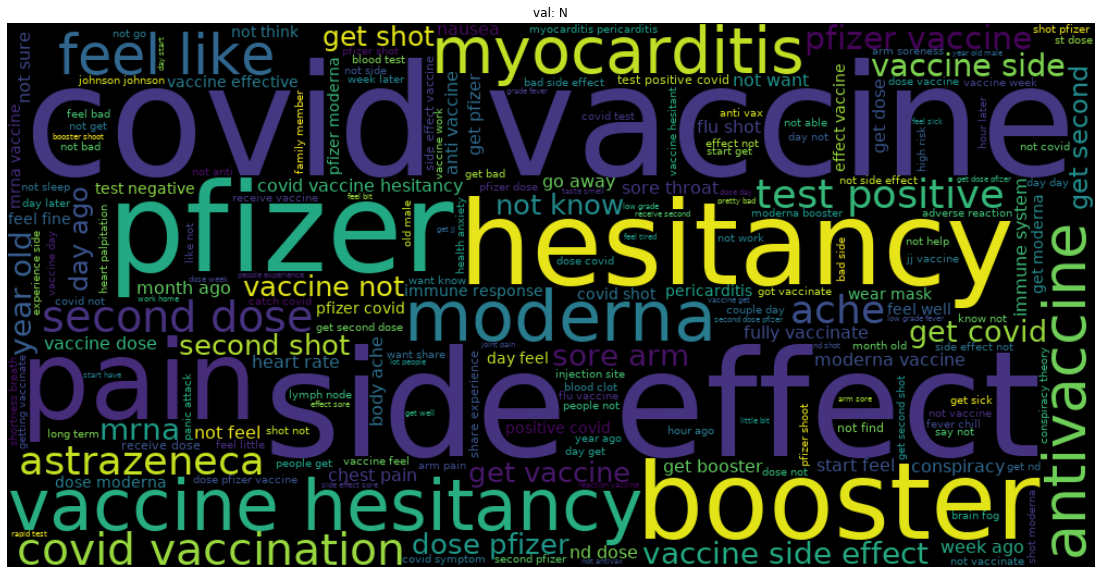

In [59]:
# A list with words which are not needed from analysis Point of View
stopword = ["covid", "like", "people", "get", "doctor", "work", "receive", "need", "let", "not", "think", "go", "day",
            "time", "say", "long", "wonder"]

# Function to remove overlapping n-grams
def ngrams_removal(tf_vectorizer, txt, important_unigrams):
    # Fitting the TfidfVectorizer on the text data and transforming it into a matrix of TF-IDF features
    tf_idf_mat2 = tf_vectorizer.transform(txt)
    
    # Getting the feature names (kwords) and their tf-idf scores
    kwords = tf_vectorizer.get_feature_names()
    a = np.sum(tf_idf_mat2, axis=0)
    a = np.squeeze(np.asarray(a))
    
    # Creating a dictionary of kwords and their scores
    a = dict(zip(kwords, a))
    
    # Remove overlapping n-grams
    for ngram in kwords:
        words = ngram.split()
        if all(word in a for word in words) and all(word not in important_unigrams for word in words):
            del a[ngram]
    
    return a

# Define the list of important unigrams that you want to keep
important_unigrams = ['myocarditis', 'antivaxxers', 'pericarditis', 'nausea', 'menstrual', 'ache', 'pain', 'hesitancy', 
                     'conspiracy', 'booster', 'pfizer', 'moderna', 'astrazeneca', 'mrna', 'antivaccine']

# Looping through each unique value in the 'Vac Hes/Non' column
for val in df2['Vac Hes/Non'].unique():
    # Filtering the records for the current value
    txt = df2[df2['Vac Hes/Non'] == val]['Tokens'].apply(lambda x: ' '.join(x))
    
    # Call the function to get the dictionary of keywords and their scores without overlapping n-grams
    a = ngrams_removal(tf_vectorizer, txt, important_unigrams)
    
    # Creating a WordCloud object
    wc = WordCloud(width = 1000, height = 500, max_words = 200, background_color = 'black', stopwords = stopword,
                   font_path = 'C:/Users/USER/Downloads/dejavu-sans/DejaVuSans.ttf')
    
    # Generating the word cloud using the keyword a
    wc.generate_from_frequencies(a)
    
    # Displaying the word cloud
    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"val: {val}")
    plt.show()




In [74]:
# Filter out posts that contain either 'myocarditis' or 'pericarditis' in the 'Text' column
myocarditis = df2[df2['Content'].str.contains('myocarditis|pericarditis')]

# Display the filtered DataFrame
myocarditis.head()

,Content,Score,Vac Hes/Non,Tokens,Entity,POS,LDA Dominant Topic,Dominant Topic Number using LDA,NMF Dominant Topic,Dominant Topic Number using NMF,Compound,Sentiment
133,hey redditxbi have a question that i have been...,7,N,"[hey, redditxbi, question, ask, bit, usually, ...","[(two, CARDINAL), (second, ORDINAL), (a few mo...","[INTJ, PROPN, VERB, DET, NOUN, SCONJ, PRON, AU...",1,2,3,4,-0.9455,0
372,a study looked at athletes who had had covid a...,9,H,"[study, look, athlete, covid, find, asymptomat...","[(mrna, GPE)]","[DET, NOUN, VERB, ADP, NOUN, PRON, AUX, VERB, ...",4,5,2,3,0.5106,1
373,xbour data suggest that there is no increase i...,97,H,"[xbour, datum, suggest, increase, incidence, m...",[],"[ADJ, NOUN, VERB, SCONJ, PRON, VERB, DET, NOUN...",4,5,2,3,0.0460,1
374,risk of myocarditis highest in young males age...,230,N,"[risk, myocarditis, high, young, male, age, se...","[(second, ORDINAL)]","[NOUN, ADP, PROPN, ADJ, ADP, ADJ, NOUN, VERB, ...",4,5,2,3,-0.2732,0
375,yo male extremely healthy no previous issues ...,22,N,"[yo, male, extremely, healthy, previous, issue...","[(months later in, DATE), (months, DATE), (nig...","[SPACE, PROPN, NOUN, ADV, ADJ, DET, ADJ, NOUN,...",1,2,3,4,0.0709,1


In [65]:
# A new dataframe which derived from myocarditis with only 4 columns mentioned below
cols = ["Content", "Tokens", "Sentiment", "Vac Hes/Non"]
filtered_myo = myocarditis[cols]

In [73]:
filtered_myo.head()

,Content,Tokens,Sentiment,Vac Hes/Non
133,hey redditxbi have a question that i have been...,"[hey, redditxbi, question, ask, bit, usually, ...",0,N
372,a study looked at athletes who had had covid a...,"[study, look, athlete, covid, find, asymptomat...",1,H
373,xbour data suggest that there is no increase i...,"[xbour, datum, suggest, increase, incidence, m...",1,H
374,risk of myocarditis highest in young males age...,"[risk, myocarditis, high, young, male, age, se...",0,N
375,yo male extremely healthy no previous issues ...,"[yo, male, extremely, healthy, previous, issue...",1,N


In [75]:
filtered_myo.shape

(353, 4)

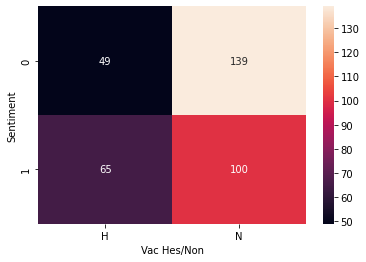

In [68]:
# Creating a confusion matrix using crosstab
myo_matrix = pd.crosstab(filtered_myo["Sentiment"], filtered_myo["Vac Hes/Non"], rownames = ["Sentiment"], colnames = ["Vac Hes/Non"])

# Visualizing the confusion matrix using a heatmap
sns.heatmap(myo_matrix, annot=True, fmt = "d")
plt.show()

In [76]:
filtered_myo.to_csv("Myocarditis_df.csv", columns = cols, index = True)